In [2]:
import pandas as pd

In [3]:
gtf_file_path = "/links/groups/treutlein/USERS/jjans/resources/genomes/hsapiens/Homo_sapiens.GRCh38.111.chr.gtf"

def get_ens_dict(file_path):
    with open(file_path) as f:
        gtf = list(f)

    gtf = [x for x in gtf if not x.startswith('#')]
    gtf = [x for x in gtf if 'gene_id "' in x and 'gene_name "' in x]
    if len(gtf) == 0:
        print('you need to change gene_id " and gene_name " formats')
    
    gtf = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
    gtf = dict(set(gtf))
    return gtf

gtf_dict = get_ens_dict(gtf_file_path) #replace with your file path

In [4]:
import os

In [5]:
i = 0
for gaba_pre_sample in os.listdir("iGABA_pre"):
    df = pd.read_csv("iGABA_pre/"+gaba_pre_sample+"/10.MAPPING/"+gaba_pre_sample+"_STAR_ReadsPerGene.out.tab",sep="\t",skiprows=4,header=None)


    #parse data
    df.columns = ['Gene_ID','Unstranded','1st_read','2nd_read']
    result_list = [gtf_dict[x] if x in gtf_dict else x for x in df['Gene_ID']]
    df['Gene_Symbol'] = result_list
    df.index = df['Gene_Symbol']

    if i == 0:
        df_all = pd.DataFrame(index=df.index,columns=os.listdir("iGABA_pre"))
        i+=1

    df[gaba_pre_sample] = df['Unstranded']
    df_all[gaba_pre_sample] = df[gaba_pre_sample]
    


In [38]:
df_all = df_all.groupby('Gene_Symbol').sum()

In [39]:
df_all.to_csv("bulk/iGABA_pre_merged_symbols.tsv",sep="\t")

In [6]:
df_all.sum().sort_values()

iGABA_pre_24     421492
iGABA_pre_23     920916
iGABA_pre_74    1045205
iGABA_pre_66    1048094
iGABA_pre_30    1122436
                 ...   
iGABA_pre_50    3640130
iGABA_pre_54    3705051
iGABA_pre_55    3778982
iGABA_pre_18    3792242
iGABA_pre_7     4434973
Length: 96, dtype: int64

In [7]:
df_all_CPM = df_all/df_all.sum()*1e6

In [8]:
import seaborn as sns

In [9]:
var_genes = df_all_CPM.T.var().sort_values(ascending=False).head(n=1000).index

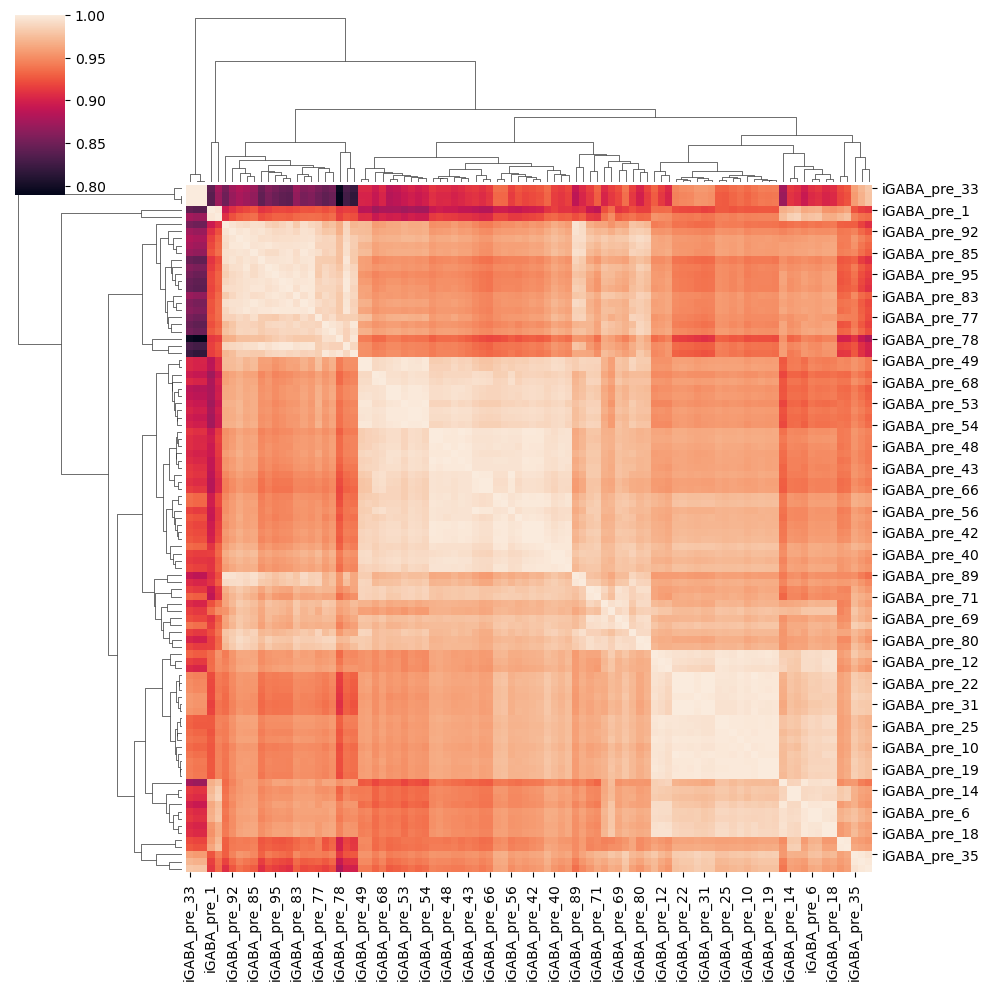

In [10]:
sns.clustermap(df_all_CPM.loc[var_genes].corr())

In [11]:
df_all_CPM.loc["NEUROG2"].sort_values()

iGABA_pre_22     0.000000
iGABA_pre_4      0.000000
iGABA_pre_2      0.000000
iGABA_pre_30     0.000000
iGABA_pre_36     0.000000
                  ...    
iGABA_pre_88     8.656038
iGABA_pre_96    12.123695
iGABA_pre_92    14.957985
iGABA_pre_91    15.624623
iGABA_pre_95    15.675530
Name: NEUROG2, Length: 96, dtype: float64

In [41]:
df_all_glut = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/prepatterning_multiome/bulk/expression_data_names.tsv",sep="\t",index_col=0)

df_all_glut.columns = ['iGlut_pre_'+str(x) for x in df_all_glut.columns]

In [44]:
df_all_glut.to_csv("bulk/iGlut_pre_merged_symbols.tsv",sep='\t')

In [13]:
df_all_glut_CPM = df_all_glut/df_all_glut.sum()*1e6


In [14]:
common_genes = list(set(df_all_CPM.index)&set(df_all_glut_CPM.index))

df_all_CPM_use = df_all_CPM.loc[common_genes].copy()
df_all_glut_CPM_use = df_all_glut_CPM.loc[common_genes].copy()

df_all_CPM_use = df_all_CPM_use.groupby('Gene_Symbol').sum()

In [15]:
df_all_glut_CPM_use = df_all_glut_CPM_use[sorted(df_all_glut_CPM_use.columns)]

df_all_CPM_use = df_all_CPM_use[sorted(df_all_CPM_use.columns)]




In [61]:
df_corr = pd.DataFrame(index=df_all_CPM_use.columns,columns=df_all_glut_CPM_use.columns)

for col in df_all_glut_CPM_use.columns:
    df_corr[col] = df_all_CPM_use.corrwith(df_all_glut_CPM_use[col])


KeyboardInterrupt



In [16]:
df_all_glut_CPM_use

,iGlut_pre_1,iGlut_pre_10,iGlut_pre_11,iGlut_pre_12,iGlut_pre_13,iGlut_pre_14,iGlut_pre_15,iGlut_pre_16,iGlut_pre_17,iGlut_pre_18,...,iGlut_pre_88,iGlut_pre_89,iGlut_pre_9,iGlut_pre_90,iGlut_pre_91,iGlut_pre_92,iGlut_pre_93,iGlut_pre_94,iGlut_pre_95,iGlut_pre_96
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000229983,0.376748,1.963518,0.426803,0.420608,0.000000,0.000000,0.781737,0.000000,0.000000,1.314058,...,0.000000,3.074200,0.000000,1.157731,1.131091,0.837256,1.056888,1.832317,1.177338,0.000000
DST,204.950689,280.292171,335.467063,306.202708,361.805256,288.655410,376.015378,289.812959,401.271254,255.803207,...,330.639566,340.357881,343.446256,277.469585,309.541844,309.366047,320.237194,238.659330,338.680801,378.288001
NXPE4,0.753495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CAAP1,26.372331,29.943647,27.315384,27.760136,16.036773,27.223489,31.660339,32.845469,26.696655,29.785305,...,26.216392,26.789459,29.732306,37.047399,40.342238,27.210816,27.831395,23.820125,23.939199,31.764641
OR5B17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EIF1B-AS1,4.520971,6.872312,3.841226,10.515203,7.431676,1.728476,10.553446,3.864173,3.696460,2.628115,...,3.912894,8.783429,8.386035,5.016835,4.147333,2.511768,5.284442,6.871190,5.494242,2.887695
HCFC1-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.377030,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000287242,0.753495,0.000000,0.853606,0.000000,0.000000,0.000000,0.390868,0.000000,1.642871,0.000000,...,0.000000,0.000000,1.143550,2.315462,0.754061,0.837256,0.000000,3.664635,1.962229,0.000000


In [17]:
df_all_glut_CPM_use.shape

(36030, 96)

In [18]:
tst2 = df_all_CPM_use.apply(lambda s: df_all_glut_CPM_use.corrwith(s))


In [76]:
from scipy.stats import spearmanr

In [78]:
tst = spearmanr(a=df_all_CPM_use,b=df_all_glut_CPM_use,axis=0)

In [83]:
pd.DataFrame(tst[0])

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,1.000000,0.886534,0.678243,0.924055,0.886409,0.764064,0.897963,0.903111,0.904308,0.898543,...,0.011079,0.010742,0.011576,0.008699,0.010153,0.009388,0.009289,0.008689,0.011420,0.012226
1,0.886534,1.000000,0.668806,0.886814,0.886041,0.751427,0.871346,0.874232,0.908572,0.872327,...,0.006638,0.006068,0.006486,0.003221,0.005969,0.005694,0.004956,0.004607,0.005325,0.007434
2,0.678243,0.668806,1.000000,0.678097,0.669206,0.657960,0.667689,0.667852,0.674005,0.665225,...,0.004575,0.002558,0.005944,0.002673,0.003576,0.003228,0.002671,0.003776,0.004265,0.005593
3,0.924055,0.886814,0.678097,1.000000,0.885823,0.763842,0.895075,0.900282,0.903644,0.896974,...,0.005962,0.007304,0.006730,0.004629,0.006891,0.005818,0.004897,0.004968,0.006563,0.007995
4,0.886409,0.886041,0.669206,0.885823,1.000000,0.749752,0.893619,0.893924,0.888696,0.896612,...,0.004438,0.004282,0.005909,0.003485,0.003756,0.003595,0.004227,0.005409,0.004650,0.005603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.009388,0.005694,0.003228,0.005818,0.003595,0.003038,0.004138,0.003802,0.005639,0.003241,...,0.913692,0.904057,0.874262,0.891158,0.908600,1.000000,0.903785,0.889267,0.908671,0.910959
188,0.009289,0.004956,0.002671,0.004897,0.004227,0.005976,0.003303,0.004242,0.005657,0.003348,...,0.908587,0.917404,0.888726,0.907417,0.912739,0.903785,1.000000,0.904085,0.914752,0.911943
189,0.008689,0.004607,0.003776,0.004968,0.005409,0.004899,0.004437,0.004484,0.005192,0.004433,...,0.893877,0.900326,0.887213,0.914136,0.897014,0.889267,0.904085,1.000000,0.900264,0.896636
190,0.011420,0.005325,0.004265,0.006563,0.004650,0.006869,0.003958,0.004683,0.007027,0.004264,...,0.911915,0.914091,0.884270,0.903240,0.914612,0.908671,0.914752,0.900264,1.000000,0.915296


['iGABA_pre_1',
 'iGABA_pre_10',
 'iGABA_pre_11',
 'iGABA_pre_12',
 'iGABA_pre_13',
 'iGABA_pre_14',
 'iGABA_pre_15',
 'iGABA_pre_16',
 'iGABA_pre_17',
 'iGABA_pre_18',
 'iGABA_pre_19',
 'iGABA_pre_2',
 'iGABA_pre_20',
 'iGABA_pre_21',
 'iGABA_pre_22',
 'iGABA_pre_23',
 'iGABA_pre_24',
 'iGABA_pre_25',
 'iGABA_pre_26',
 'iGABA_pre_27',
 'iGABA_pre_28',
 'iGABA_pre_29',
 'iGABA_pre_3',
 'iGABA_pre_30',
 'iGABA_pre_31',
 'iGABA_pre_32',
 'iGABA_pre_33',
 'iGABA_pre_34',
 'iGABA_pre_35',
 'iGABA_pre_36',
 'iGABA_pre_37',
 'iGABA_pre_38',
 'iGABA_pre_39',
 'iGABA_pre_4',
 'iGABA_pre_40',
 'iGABA_pre_41',
 'iGABA_pre_42',
 'iGABA_pre_43',
 'iGABA_pre_44',
 'iGABA_pre_45',
 'iGABA_pre_46',
 'iGABA_pre_47',
 'iGABA_pre_48',
 'iGABA_pre_49',
 'iGABA_pre_5',
 'iGABA_pre_50',
 'iGABA_pre_51',
 'iGABA_pre_52',
 'iGABA_pre_53',
 'iGABA_pre_54',
 'iGABA_pre_55',
 'iGABA_pre_56',
 'iGABA_pre_57',
 'iGABA_pre_58',
 'iGABA_pre_59',
 'iGABA_pre_6',
 'iGABA_pre_60',
 'iGABA_pre_61',
 'iGABA_pre_62',
 'i

In [19]:
import seaborn as sns

<Axes: >

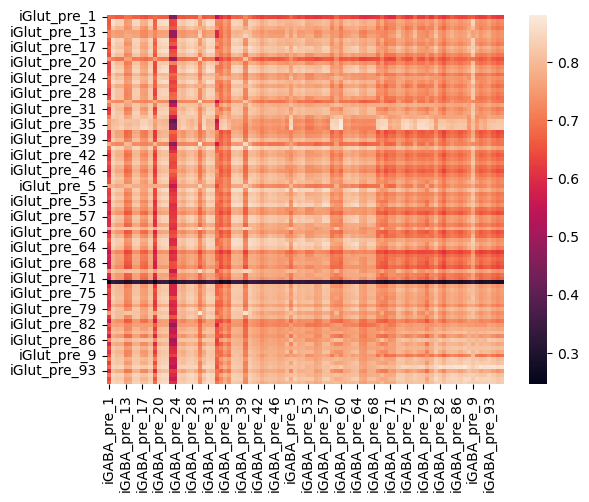

In [20]:
sns.heatmap(tst2)

In [31]:
tst2 = tst2.drop('iGlut_pre_72')
tst2 = tst2.drop('iGABA_pre_24',axis=1)

In [32]:
tst2_Z1 = (tst2-tst2.mean())/tst2.std()
tst2_Z2 = (tst2.T-tst2.T.mean())/tst2.T.std()

In [33]:
tst2_Z3 = tst2_Z2.T*tst2_Z1

<Axes: >

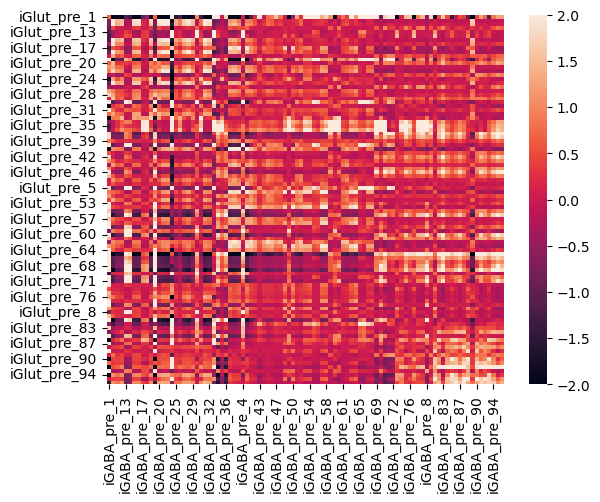

In [35]:
sns.heatmap(tst2_Z3,vmax=2,vmin=-2)

In [25]:
tst2_Z2.head()

,iGlut_pre_1,iGlut_pre_10,iGlut_pre_11,iGlut_pre_12,iGlut_pre_13,iGlut_pre_14,iGlut_pre_15,iGlut_pre_16,iGlut_pre_17,iGlut_pre_18,...,iGlut_pre_88,iGlut_pre_89,iGlut_pre_9,iGlut_pre_90,iGlut_pre_91,iGlut_pre_92,iGlut_pre_93,iGlut_pre_94,iGlut_pre_95,iGlut_pre_96
iGABA_pre_1,0.994844,-2.511928,-2.284681,-2.126198,-0.679894,-0.803349,-2.257510,-2.512640,-2.358579,-2.696638,...,-3.015683,-3.455063,-2.119062,-1.934823,-3.101522,-2.240732,-3.636331,-2.315659,-3.022184,-2.852768
iGABA_pre_10,0.851457,1.653747,1.593345,1.621234,0.339822,0.259020,1.656038,1.745396,0.912228,1.490371,...,1.015156,0.853643,1.768529,0.885356,0.756718,0.585742,0.977046,1.028634,0.596785,1.029358
iGABA_pre_11,0.490030,1.114635,1.091340,0.886039,0.092566,0.062900,1.103743,1.110472,0.539994,0.940770,...,0.669441,0.458177,1.143230,0.552622,0.520524,0.481097,0.463577,0.655808,0.419836,0.683274
iGABA_pre_12,0.570959,1.161313,1.173595,0.879118,0.059347,-0.018575,1.177546,1.138829,0.441782,0.913869,...,0.773223,0.387254,1.252033,0.624898,0.528261,0.618934,0.368284,0.769123,0.408113,0.827019
iGABA_pre_13,1.391031,-0.646706,-0.514022,-0.422081,0.381696,0.457810,-0.516426,-0.706357,-0.554833,-0.689617,...,-0.731564,-1.127013,-0.500116,-0.277907,-0.861322,-0.417387,-1.285624,-0.404273,-0.835774,-0.639045


In [23]:
tst2_Z1

,iGABA_pre_1,iGABA_pre_10,iGABA_pre_11,iGABA_pre_12,iGABA_pre_13,iGABA_pre_14,iGABA_pre_15,iGABA_pre_16,iGABA_pre_17,iGABA_pre_18,...,iGABA_pre_88,iGABA_pre_89,iGABA_pre_9,iGABA_pre_90,iGABA_pre_91,iGABA_pre_92,iGABA_pre_93,iGABA_pre_94,iGABA_pre_95,iGABA_pre_96
iGlut_pre_1,0.619144,-2.265936,-2.153842,-2.089926,-0.412451,-0.571287,-2.184135,-2.178855,-1.549172,-1.555472,...,-1.646009,-1.641652,-2.237333,-1.629353,-1.513092,-1.607243,-1.397260,-1.466291,-1.353385,-1.498490
iGlut_pre_10,0.266532,0.874387,0.829369,0.835171,0.427423,0.489472,0.864920,0.870163,0.665746,0.639921,...,0.192729,0.240834,0.847771,0.172359,0.175388,0.166404,0.235384,0.190282,0.131581,0.118338
iGlut_pre_11,0.295563,0.830863,0.795170,0.834280,0.454903,0.535397,0.852492,0.849209,0.654689,0.622258,...,0.052560,0.052198,0.793140,-0.016849,0.049320,-0.006597,0.110528,0.073679,0.039304,0.000722
iGlut_pre_12,0.412887,0.258387,0.127138,0.099188,0.267891,0.269422,0.220691,0.241671,-0.010070,-0.044103,...,-0.143134,0.114834,0.227713,-0.011456,-0.146892,-0.017526,-0.099205,-0.265240,-0.311462,-0.286104
iGlut_pre_13,1.085845,-0.823532,-0.640736,-0.679612,0.656308,0.515890,-0.661467,-0.663122,-0.336781,-0.312703,...,0.221946,0.487117,-0.666604,0.425777,0.290329,0.409920,0.437912,0.227186,0.281475,0.251175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iGlut_pre_92,0.660741,0.578188,0.879606,0.977749,1.052460,1.061022,0.778936,0.736805,1.281529,1.337040,...,1.990330,1.475017,0.731949,1.748216,2.148187,1.937106,1.808088,2.095272,2.179340,2.111186
iGlut_pre_93,-0.750031,-0.109960,-0.125098,-0.219321,-0.398740,-0.401796,-0.155878,-0.136515,-0.340608,-0.327719,...,0.557024,0.817379,-0.108752,0.870820,0.617472,0.728858,0.460056,0.454958,0.383980,0.487882
iGlut_pre_94,0.911447,0.656157,0.778306,0.830661,1.021802,0.998065,0.741278,0.739725,1.145136,1.162567,...,1.311017,1.232604,0.708687,1.306879,1.369869,1.267350,1.410161,1.426154,1.379246,1.318288
iGlut_pre_95,0.045472,0.438838,0.677985,0.636740,0.597153,0.582241,0.565779,0.556116,0.729134,0.775095,...,1.606069,1.541198,0.570569,1.719712,1.734135,1.707956,1.492871,1.603192,1.588242,1.598686


In [89]:
df_corr_plot = df_corr.loc[sorted(df_all_CPM_use.columns),sorted(df_all_glut_CPM_use.columns)]

In [92]:
df_corr_plot = df_corr_plot.dropna(axis=1)

In [120]:
gaba_genes = list(set(df_all_CPM_use.T.var().sort_values(ascending=False).head(n=1000).index))
glut_genes = list(set(df_all_glut_CPM_use.T.var().sort_values(ascending=False).head(n=1000).index))
shared_var_genes = gaba_genes + glut_genes
shared_var_genes = list(set(shared_var_genes))

In [128]:
df_all_CPM_use_c = df_all_CPM_use.drop('iGABA_pre_24',axis=1)
df_all_CPM_use_c = df_all_CPM_use_c.drop('iGABA_pre_23',axis=1)

In [129]:
c = mapping(df_all_CPM_use_c.loc[shared_var_genes],df_all_glut_CPM_use.loc[shared_var_genes])

In [131]:
c.mean()

iGABA_pre_1     0.001414
iGABA_pre_10    0.025400
iGABA_pre_11    0.000000
iGABA_pre_12    0.001250
iGABA_pre_13    0.000000
                  ...   
iGABA_pre_92    0.000164
iGABA_pre_93    0.008373
iGABA_pre_94    0.000000
iGABA_pre_95    0.000300
iGABA_pre_96    0.019082
Length: 94, dtype: float64

<Axes: >

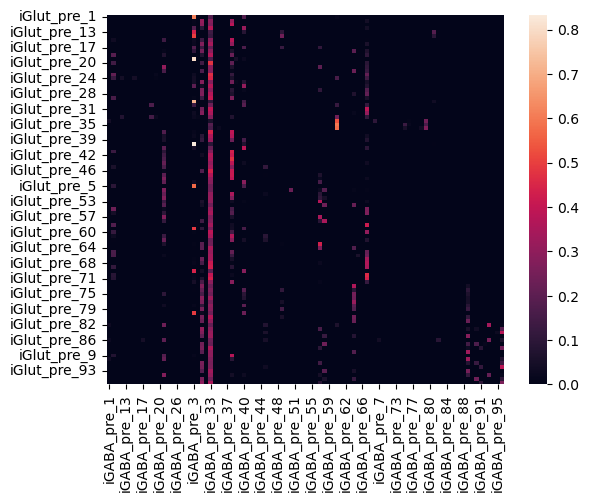

In [130]:
sns.heatmap(c)

In [113]:
def mapping(data1,data2):
    import scipy 
    x_total = pd.DataFrame(columns=data1.columns,index=data2.columns)
    A = data1
    for cluster in data2.columns:
        b = data2[cluster]
        x,r = scipy.optimize.nnls(A,b)
        x_total.loc[cluster] = x
    x_total = x_total.astype("float")
    return(x_total)


def match_atlas(atlas1, atlas2, marker_genes):
    ab = list(set(atlas1.index)&set(atlas2.index))
    top_var_genes = list(set(ab)&set(marker_genes))
    print(len(top_var_genes))

    avg_genedf_use = atlas1.loc[top_var_genes]
    ls_atlas_use = atlas2.loc[top_var_genes]
    ls_atlas_use = ls_atlas_use.dropna(axis=1)

    a = mapping(avg_genedf_use,ls_atlas_use)
    b = mapping(ls_atlas_use,avg_genedf_use)

    c = a*b.T

    c_Z = (c.T-c.T.mean())/c.T.std()
    c_Z = c_Z.T.dropna()

    c_max = c.max()
    matched_clusters = list(c_max[c_max>0.01].index)
    matched_clusters_partners = list(c[matched_clusters].idxmax())
    sns.heatmap(c.loc[matched_clusters_partners,matched_clusters],vmax=0.1,cmap='viridis')
    plt.show()
    plt.close()
    
    d = pd.DataFrame([matched_clusters,matched_clusters_partners])
    d = d.T
    d.index = d[0]
    d.drop(0,axis=1,inplace=True)


    return(a,b,c,d)

<Axes: >

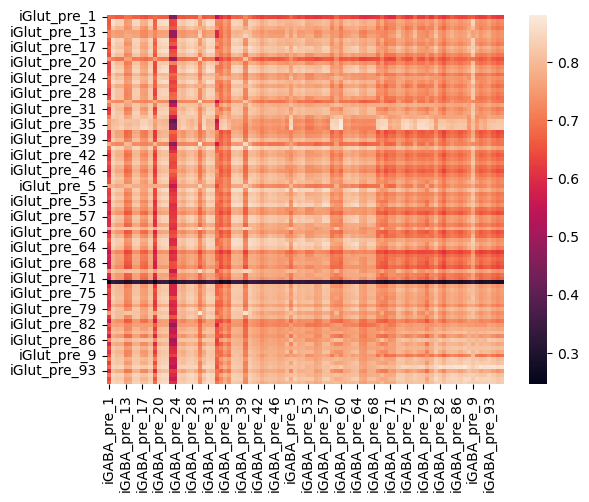

In [107]:
sns.heatmap(tst2)

In [1]:
tst2

NameError: name 'tst2' is not defined

In [104]:
tst2

,iGABA_pre_1,iGABA_pre_10,iGABA_pre_11,iGABA_pre_12,iGABA_pre_13,iGABA_pre_14,iGABA_pre_15,iGABA_pre_16,iGABA_pre_17,iGABA_pre_18,...,iGABA_pre_88,iGABA_pre_89,iGABA_pre_9,iGABA_pre_90,iGABA_pre_91,iGABA_pre_92,iGABA_pre_93,iGABA_pre_94,iGABA_pre_95,iGABA_pre_96
iGlut_pre_1,0.681609,0.675827,0.661251,0.664515,0.697586,0.694967,0.668507,0.670884,0.656940,0.649957,...,0.637865,0.657674,0.664644,0.636797,0.623186,0.632092,0.661619,0.629001,0.618854,0.622600
iGlut_pre_10,0.657919,0.861286,0.834967,0.837246,0.748979,0.758797,0.845711,0.847302,0.789874,0.782801,...,0.757902,0.773599,0.842103,0.751810,0.735890,0.746173,0.765589,0.739941,0.720953,0.731380
iGlut_pre_11,0.659870,0.858716,0.832975,0.837193,0.750660,0.761560,0.844989,0.846090,0.789210,0.781732,...,0.748751,0.761982,0.838961,0.739732,0.727475,0.735046,0.757638,0.732133,0.714608,0.723467
iGlut_pre_12,0.667752,0.824907,0.794075,0.793785,0.739217,0.745556,0.808270,0.810937,0.749313,0.741410,...,0.735976,0.765840,0.806437,0.740077,0.714378,0.734343,0.744282,0.709435,0.690491,0.704169
iGlut_pre_13,0.712964,0.761011,0.749361,0.747796,0.762984,0.760387,0.757001,0.758585,0.729705,0.725157,...,0.759809,0.788765,0.754994,0.767988,0.743562,0.761836,0.778487,0.742413,0.731258,0.740317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iGlut_pre_92,0.684404,0.843793,0.837892,0.845665,0.787225,0.793190,0.840714,0.839586,0.826832,0.824983,...,0.875253,0.849601,0.835441,0.852406,0.867572,0.860066,0.865743,0.867518,0.861745,0.865458
iGlut_pre_93,0.589623,0.803153,0.779387,0.774976,0.698425,0.705166,0.786385,0.789055,0.729475,0.724249,...,0.781684,0.809103,0.787083,0.796397,0.765399,0.782351,0.779897,0.757667,0.738306,0.756243
iGlut_pre_94,0.701247,0.848398,0.831993,0.836979,0.785349,0.789401,0.838526,0.839755,0.818646,0.814426,...,0.830906,0.834673,0.834103,0.824233,0.815620,0.816987,0.840402,0.822707,0.806735,0.812112
iGlut_pre_95,0.643068,0.835564,0.826151,0.825528,0.759365,0.764379,0.828326,0.829131,0.793678,0.790980,...,0.850167,0.853676,0.826158,0.850587,0.839935,0.845327,0.845669,0.834564,0.821105,0.830977


<Axes: >

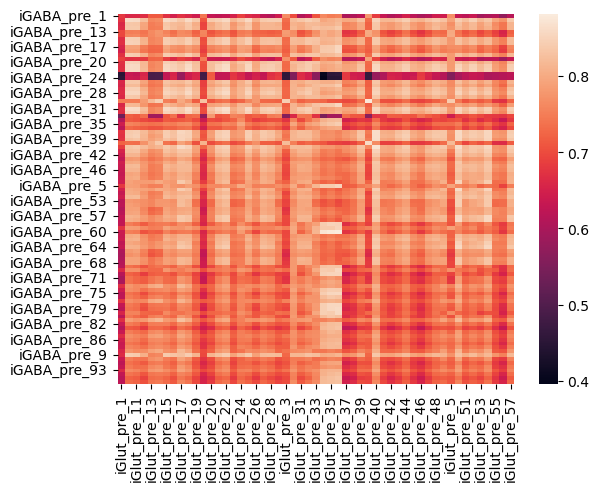

In [95]:
sns.heatmap(df_corr_plot)

In [ ]:
df_corr

In [57]:
df_all_CPM_use.corrwith(df_all_glut_CPM_use['iGlut_pre1'])

iGABA_pre_22    0.668848
iGABA_pre_1     0.681205
iGABA_pre_23    0.449097
iGABA_pre_21    0.667884
iGABA_pre_93    0.661221
                  ...   
iGABA_pre_34    0.608822
iGABA_pre_29    0.660381
iGABA_pre_67    0.606510
iGABA_pre_79    0.621181
iGABA_pre_13    0.697165
Length: 96, dtype: float64

In [35]:
df = pd.read_csv("iGABA_pre/iGABA_pre_24/10.MAPPING/iGABA_pre_24_STAR_ReadsPerGene.out.tab",sep="\t",skiprows=4,header=None)


In [42]:
df

,Gene_ID,Unstranded,1st_read,2nd_read,Gene_Symbol
Gene_Symbol,,,,,
DDX11L17,ENSG00000279928,0,0,0,DDX11L17
ENSG00000228037,ENSG00000228037,0,0,0,ENSG00000228037
PRDM16,ENSG00000142611,12,7,5,PRDM16
ENSG00000284616,ENSG00000284616,1,1,0,ENSG00000284616
PEX10,ENSG00000157911,4,2,2,PEX10
...,...,...,...,...,...
MT-ND6,ENSG00000198695,309,305,327,MT-ND6
MT-TE,ENSG00000210194,0,5,4,MT-TE
MT-CYB,ENSG00000198727,1949,968,992,MT-CYB


In [30]:
df[1].sum()

421492

In [31]:
df[2].sum()

220995

In [32]:
df[3].sum()

218122

In [ ]:
N_unmapped	389155	389155	389155
N_multimapping	379189	379189	379189
N_noFeature	1284130	1500055	1502775
N_ambiguous	22265	6837	6990


In [28]:
df.reset_index()

,0,1,2,3,Gene
0,ENSG00000279928,0,0,0,DDX11L17
1,ENSG00000228037,0,0,0,ENSG00000228037
2,ENSG00000142611,12,7,5,PRDM16
3,ENSG00000284616,1,1,0,ENSG00000284616
4,ENSG00000157911,4,2,2,PEX10
...,...,...,...,...,...
63182,ENSG00000198695,309,305,327,MT-ND6
63183,ENSG00000210194,0,5,4,MT-TE
63184,ENSG00000198727,1949,968,992,MT-CYB
63185,ENSG00000210195,1,0,1,MT-TT


In [20]:
gtf_dict['']

KeyError: 'ENSG00000228037'

In [13]:
vcf = pd.read_csv("",sep="\t",skiprows=10)


/tmp/ipykernel_30883/2749227282.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  vcf = pd.read_csv("/links/groups/treutlein/USERS/jjans/resources/genomes/hsapiens/Homo_sapiens.GRCh38.111.chr.gtf",sep="\t",skiprows=10)


In [14]:
vcf.head()

,1,havana,exon,183740,183901,.,+,..1,"gene_id ""ENSG00000279928""; gene_version ""2""; transcript_id ""ENST00000624431""; transcript_version ""2""; exon_number ""4""; gene_name ""DDX11L17""; gene_source ""havana""; gene_biotype ""unprocessed_pseudogene""; transcript_name ""DDX11L17-201""; transcript_source ""havana""; transcript_biotype ""unprocessed_pseudogene""; exon_id ""ENSE00003807458""; exon_version ""1""; tag ""basic""; tag ""Ensembl_canonical""; transcript_support_level ""NA"";"
0,1,havana,exon,183981,184174,.,+,.,"gene_id ""ENSG00000279928""; gene_version ""2""; t..."
1,1,havana,gene,2581560,2584533,.,+,.,"gene_id ""ENSG00000228037""; gene_version ""1""; g..."
2,1,havana,transcript,2581560,2584533,.,+,.,"gene_id ""ENSG00000228037""; gene_version ""1""; t..."
3,1,havana,exon,2581560,2581650,.,+,.,"gene_id ""ENSG00000228037""; gene_version ""1""; t..."
4,1,havana,exon,2583370,2583495,.,+,.,"gene_id ""ENSG00000228037""; gene_version ""1""; t..."


In [10]:
['PAX6' in df.index]

[False]

In [11]:
df

,1,2,3
0,,,
ENSG00000279928,0,0,0
ENSG00000228037,0,0,0
ENSG00000142611,12,7,5
ENSG00000284616,1,1,0
ENSG00000157911,4,2,2
...,...,...,...
ENSG00000198695,309,305,327
ENSG00000210194,0,5,4
ENSG00000198727,1949,968,992
